# Instagram Agent Demo

This notebook demonstrates how to use the `ig_agent` library to generate Instagram carousel posts with AI.

## 1. Setup and Installation

First, ensure you have all the necessary dependencies installed:

In [28]:
# Install dependencies if needed
!pip install -q langchain_xai cairosvg
!pip install -q -e .

## 2. Basic Usage - Direct API

The simplest way to use the Instagram Agent is through its direct API, which provides methods for each step of the content generation and posting process.

In [29]:
import os
import logging
from pathlib import Path
from IPython.display import Image, display, HTML
from langchain_xai import ChatXAI
from ig_agent import InstagramAgent

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)
logger = logging.getLogger("ig_agent_demo")

In [30]:
# Create base output directory 
# Now outputs will be stored in datetime subdirectories
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)

# Initialize language model
# You can use any LangChain compatible LLM here
llm = ChatXAI(model="grok-3-mini-beta")

# Initialize the Instagram agent
# Output will automatically be stored in a datetime-based directory structure
# For example: output/2025-04-20/20250420_154900/
agent = InstagramAgent(
    llm=llm,
    output_dir=output_dir,
    # Optional: provide credentials for notification and posting
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD"),
    instagram_username=os.environ.get("INSTAGRAM_USERNAME"),
    instagram_password=os.environ.get("INSTAGRAM_PASSWORD")
)

### 2.1 Generate Content

First, we generate the content for our Instagram carousel post based on a request:

In [31]:
from datetime import datetime
today = datetime.now().strftime('%Y-%b-%d')
today

'2025-Apr-24'

In [32]:
import pandas as pd
df = pd.read_json('data/content_history.json')
latest_10rows_df =df.iloc[-10:]
latest_10rows_df.to_dict()

{'date': {7: Timestamp('2025-04-22 14:27:28.514243'),
  8: Timestamp('2025-04-22 14:29:39.661358'),
  9: Timestamp('2025-04-23 13:05:53.769411'),
  10: Timestamp('2025-04-23 13:08:00.155625'),
  11: Timestamp('2025-04-23 13:10:19.583376'),
  12: Timestamp('2025-04-23 13:21:04.506031'),
  13: Timestamp('2025-04-23 13:21:46.053301'),
  14: Timestamp('2025-04-23 13:26:41.557815'),
  15: Timestamp('2025-04-23 13:37:50.518470'),
  16: Timestamp('2025-04-23 13:42:42.135440')},
 'signature': {7: '6ef8e6d08b0fcd765ed82616dd76a77b',
  8: '039e106d1527c430387fd3280613406a',
  9: 'ed10f862a395afd7033fe8a11c70bdde',
  10: '7f86a2c7270e734f6fe978e0b5ebb09d',
  11: '0a8f73a513cb6d33d993b57493ef4842',
  12: '9f2522fe9cae5d7d8b52627c6fe8eb7b',
  13: '7754adb143472cc3575c38e7cb4185ac',
  14: '0cffbebe59d10941d845a45b740b220a',
  15: '0f68a8dc0388f966e911500baab17cba',
  16: '6ed94190af586fcf4b0e485b769fc1e6'},
 'cover_heading': {7: 'Google AI大反擊！ o3與o4-mini測試曝光',
  8: 'AI 2025 重大突破 Stanford 報告揭秘',
  9:

In [33]:
# Generate content
request = f"""
今日係 {today}, 星期{datetime.now().weekday()}.
最近10近貼文：{
    latest_10rows_df.to_dict()
}
不要重覆內容。
選取以下一內容製作今日的貼文，你可選擇是否再上網搜尋資料。不要用中國字，用香港字、繁體中文撰寫。
| **內容類型**         | **具體題材**                                                                 | **預期效果**                                                                 |
|----------------------|------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **教育性貼文**       | - 解釋AI基本概念（如機器學習、深度學習、自然語言處理）<br>- 數據科學工具介紹（如Python、R、Tableau）<br>- 簡單算法原理（e.g., 線性回歸、決策樹） | 吸引初學者，提供入門知識，增加帳號專業性。                                   |
| **實用技巧分享**     | - Python/R程式碼片段（e.g., 數據清理、視覺化）<br>- Jupyter Notebook使用技巧<br>- 免費學習資源推薦（課程、書籍、YouTube頻道） | 提供實用價值，吸引技術愛好者，提升互動率。                                   |
| **案例分析**         | - AI應用案例（e.g., 醫療影像診斷、推薦系統）<br>- 數據科學項目實例（e.g., 銷售預測）<br>- 失敗案例分析（e.g., 模型過擬合問題） | 展示AI/數據科學的實際應用，激發靈感，吸引專業人士。                           |
| **趨勢與新聞**       | - 最新AI技術進展（e.g., 大語言模型、生成式AI）<br>- 數據科學行業趨勢（e.g., 自動化數據分析）<br>- 倫理問題討論（e.g., AI偏見） | 保持內容新鮮，吸引關注行業動態的受眾。                                       |
| **互動內容**         | - 問答貼文（e.g., “你用哪個數據科學工具？”）<br>- 投票（e.g., “Python vs R，哪個更好？”）<br>- 挑戰（e.g., 7天學會Pandas） | 提高粉絲參與度，建立社群感。                                               |
| **幕後花絮**         | - 數據科學家/工程師一天的工作分享<br>- 項目開發過程（e.g., 從數據收集到模型部署）<br>- 學習路徑分享（e.g., 自學數據科學的經驗） | 增加人性化元素，拉近與受眾的距離。                                           |
| **迷因與輕鬆內容**   | - AI/數據科學相關迷因（e.g., “當模型訓練了10小時還是沒收斂”）<br>- 程式員幽默（e.g., debug的痛苦）<br>- 數據科學家日常趣事 | 增加趣味性，吸引年輕受眾，提高轉發率。                                       |
| **面試內容**   | - AI/數據科學相關職位的面試內容，以FAANG公司為主。 | 增加趣味性，吸引年輕受眾，提高轉發率。                                       |

"""
content_json = agent.generate_content(request)


2025-04-24 11:46:02,395 - ig_agent - INFO - Generating content for request: 
今日係 2025-Apr-24, 星期3.
最近10近貼文：{'date': {7: Timestamp('2025-04-22 14:27:28.514243'), 8: Timestamp('2025-04-22 14:29:39.661358'), 9: Timestamp('2025-04-23 13:05:53.769411'), 10: Timestamp('2025-04-23 13:08:00.155625'), 11: Timestamp('2025-04-23 13:10:19.583376'), 12: Timestamp('2025-04-23 13:21:04.506031'), 13: Timestamp('2025-04-23 13:21:46.053301'), 14: Timestamp('2025-04-23 13:26:41.557815'), 15: Timestamp('2025-04-23 13:37:50.518470'), 16: Timestamp('2025-04-23 13:42:42.135440')}, 'signature': {7: '6ef8e6d08b0fcd765ed82616dd76a77b', 8: '039e106d1527c430387fd3280613406a', 9: 'ed10f862a395afd7033fe8a11c70bdde', 10: '7f86a2c7270e734f6fe978e0b5ebb09d', 11: '0a8f73a513cb6d33d993b57493ef4842', 12: '9f2522fe9cae5d7d8b52627c6fe8eb7b', 13: '7754adb143472cc3575c38e7cb4185ac', 14: '0cffbebe59d10941d845a45b740b220a', 15: '0f68a8dc0388f966e911500baab17cba', 16: '6ed94190af586fcf4b0e485b769fc1e6'}, 'cover_heading': {7: 'G

In [34]:
# Display the generated content structure
print(f"Cover: {content_json['cover']['heading_line1']} {content_json['cover']['heading_line2']}")
print(f"Hashtag: #{content_json['cover']['hashtag']}")
print(f"Number of content pages: {len(content_json['content_pages'])}")
print("\nContent Pages:")
for i, page in enumerate(content_json['content_pages']):
    print(f"  Page {i+1}: {page['title']} - {page['main_point']}")

print("\nCaption Preview:")
print(content_json['caption'][:200] + "...")

Cover: FAANG面試必備 數據科學祕訣揭曉
Hashtag: #DataScienceInterview
Number of content pages: 6

Content Pages:
  Page 1: 什麼是FAANG面試重點？ - FAANG公司如Google、Meta重視SQL、統計和ML問題。這些考驗你的數據處理和分析能力，能幫助你在面試中展現專業。
  Page 2: SQL查詢常見題 - 常見如JOIN操作或聚合函數。舉例：用SQL找出重複客戶數據，這能提升數據清理效率，應用在真實業務分析中。
  Page 3: 統計知識陷阱 - 面試常問p值或假設檢定。避免誤解p值代表結果大小，學習後能正確解讀數據，減少模型錯誤。
  Page 4: 機器學習算法挑戰 - 如決策樹的過擬合問題。解決方法：用交叉驗證調參，讓模型更泛化，提升工作中的預測準確性。
  Page 5: 面試準備小貼士 - 練習LeetCode題目，模擬面試。這些技巧能讓你更快適應壓力，增加求職成功率。
  Page 6: 為何這很重要？ - 掌握這些基礎，能讓你在FAANG脫穎而出，從入門到實戰，助你職場進階。

Caption Preview:
你準備好征服FAANG數據科學面試了嗎？🤔 這套貼文將帶你深入了解常見問題，從SQL查詢到機器學習陷阱，讓你快速掌握實用技巧，提升求職競爭力！無論你是新手還是資深玩家，這裡有即戰力知識，讓你避開常見錯誤，贏得Offer。滑到最後，獲得面試小貼士吧！💼

首先，我們從基礎出發，解釋面試常見題型，並提供實際範例，讓你輕鬆應用。學完後，你能自信面對挑戰！😎

#DataScience #FAANGInt...


### 2.2 Generate Images

Next, we generate the images for our carousel post based on the content:

In [35]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/opt/homebrew/lib:' + os.environ.get('DYLD_LIBRARY_PATH', '')

In [36]:
# Generate images
images = agent.generate_images(content_json)

# Display summary
print(f"Generated {len(images)} images:")
for img in images:
    print(f"  {img['type'].capitalize()}{' ' + str(img['page_number']) if 'page_number' in img else ''}: {img['file_name']}")

2025-04-24 11:46:34,399 - ig_agent - INFO - Generating images from content
2025-04-24 11:46:34,404 - ig_agent.template_processor - WARNING - PyCairo is not available, falling back to other methods
2025-04-24 11:46:34,405 - ig_agent.template_processor - INFO - CairoSVG version: 2.7.1
2025-04-24 11:46:34,409 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for cover...
2025-04-24 11:46:35,040 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-24 11:46:35,040 - ig_agent.template_processor - INFO - Generated cover image: output/2025-04-24/20250424_114602/cover.png
2025-04-24 11:46:35,042 - ig_agent.template_processor - INFO - Attempting SVG conversion with rsvg-convert for content page 1...
2025-04-24 11:46:35,227 - ig_agent.template_processor - INFO - Successfully converted SVG to PNG using rsvg-convert
2025-04-24 11:46:35,228 - ig_agent.template_processor - INFO - Generated content image 1: output/2025-04-

Generated 7 images:
  Cover: cover.png
  Content 1: content_01.png
  Content 2: content_02.png
  Content 3: content_03.png
  Content 4: content_04.png
  Content 5: content_05.png
  Content 6: content_06.png


### 2.3 Display Generated Images

Now, let's visualize the images that were generated:

In [37]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] == 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

In [38]:
# # Display cover image
# cover_image = next(img for img in images if img['type'] != 'cover')
# print("Cover Image:")
# display(Image(cover_image['path']))

### 2.4 Send Notification (Optional)

If you've provided email credentials, you can send a notification with the generated content:

In [39]:
# Send notification if credentials are available
if os.environ.get("EMAIL_USER") and os.environ.get("EMAIL_PASSWORD"):
    recipient_email = "your.email@example.com"  # Replace with your email
    notification_status = agent.send_notification(recipient_email)
    print(f"Notification sent: {notification_status['sent']}")
    if notification_status['sent']:
        print(f"Email sent to: {notification_status['recipient']}")
        print(f"Subject: {notification_status['subject']}")
else:
    print("Email credentials not available, skipping notification")

Email credentials not available, skipping notification


### 2.5 Post to Instagram (Optional)

If you've provided Instagram credentials, you can post the content to Instagram:

In [40]:
# Post to Instagram if credentials are available
if os.environ.get("INSTAGRAM_USERNAME") and os.environ.get("INSTAGRAM_PASSWORD"):
    try:
        # Try with explicit error handling
        instagram_status = agent.post_to_instagram()
        print(f"Posted to Instagram: {instagram_status['posted']}")
        
        if instagram_status['posted']:
            print(f"Post URL: {instagram_status.get('url', 'N/A')}")
            print(f"Post type: {instagram_status.get('type', 'N/A')}")
        else:
            print(f"Posting failed: {instagram_status.get('error', 'Unknown error')}")
            print(f"Suggestion: {instagram_status.get('suggestion', 'Check logs for details')}")
            
            # If simulated, show what would have been posted
            if instagram_status.get('simulated', False):
                print("\nSimulated posting:")
                print(f"Would have posted {instagram_status.get('num_images', 0)} images")
                print(f"With caption length: {len(instagram_status.get('caption', ''))}")
    except Exception as e:
        print(f"Exception during Instagram posting: {str(e)}")
        print("Check that your Instagram credentials are correct and that the instagrapi package is installed")
        print("Install with: pip install instagrapi")
else:
    print("Instagram credentials not available, skipping post")
    print("To post to Instagram, set the INSTAGRAM_USERNAME and INSTAGRAM_PASSWORD environment variables")

2025-04-24 11:46:36,142 - ig_agent - INFO - Posting to Instagram
2025-04-24 11:46:36,164 - ig_agent.instagram_poster - INFO - Converted output/2025-04-24/20250424_114602/cover.png to output/2025-04-24/20250424_114602/cover.jpg
2025-04-24 11:46:36,173 - ig_agent.instagram_poster - INFO - Converted output/2025-04-24/20250424_114602/content_01.png to output/2025-04-24/20250424_114602/content_01.jpg
2025-04-24 11:46:36,181 - ig_agent.instagram_poster - INFO - Converted output/2025-04-24/20250424_114602/content_02.png to output/2025-04-24/20250424_114602/content_02.jpg
2025-04-24 11:46:36,188 - ig_agent.instagram_poster - INFO - Converted output/2025-04-24/20250424_114602/content_03.png to output/2025-04-24/20250424_114602/content_03.jpg
2025-04-24 11:46:36,195 - ig_agent.instagram_poster - INFO - Converted output/2025-04-24/20250424_114602/content_04.png to output/2025-04-24/20250424_114602/content_04.jpg
2025-04-24 11:46:36,203 - ig_agent.instagram_poster - INFO - Converted output/2025-04

Code entered "142211" for datasci_daily (0 attempts by 5 seconds)


2025-04-24 11:47:14,174 - instagrapi - INFO - https://i.instagram.com/api/v1/challenge/ASjEmPmSNz5BwQCs4IZGHnplV_wDhDYvn0wZK0uli2OfKeiNdQVXPnL7tpBDJ676POisvDI/ASRC24NGTvIfbq2cvDokqkmAcEVsMKBlq7WVITdoVHvcAmZT20S0XQIv1lkhqkBM7BEaBzX3v87O8A/
2025-04-24 11:47:26,576 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/challenge/ASjEmPmSNz5BwQCs4IZGHnplV_wDhDYvn0wZK0uli2OfKeiNdQVXPnL7tpBDJ676POisvDI/ASRC24NGTvIfbq2cvDokqkmAcEVsMKBlq7WVITdoVHvcAmZT20S0XQIv1lkhqkBM7BEaBzX3v87O8A/ (269.0.0.18.75, OnePlus 6T Dev)
2025-04-24 11:47:26,582 - instagrapi - INFO - https://i.instagram.com/api/v1/accounts/login/
2025-04-24 11:47:28,947 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/accounts/login/ (269.0.0.18.75, OnePlus 6T Dev)
2025-04-24 11:47:29,950 - instagrapi - INFO - https://i.instagram.com/api/v1/feed/reels_tray/
2025-04-24 11:47:30,515 - private_request - INFO - datasci_daily [200] POST https://i.instagram.com/api/v1/feed/reels_

Posted to Instagram: True
Post URL: https://www.instagram.com/p/DI0JUjwM_xX/
Post type: carousel


## 3. Using the LangGraph Pipeline

The Instagram Agent can also be used with a LangGraph pipeline, which provides a graph-based workflow with streaming intermediate results.

In [41]:
from ig_agent.pipeline import create_pipeline

# Create the pipeline
pipeline = create_pipeline(
    llm=llm,
    output_dir=output_dir,
    email_user=os.environ.get("EMAIL_USER"),
    email_password=os.environ.get("EMAIL_PASSWORD")
)

### 3.1 Visualize the Pipeline Graph

Let's visualize the pipeline graph to understand the workflow:

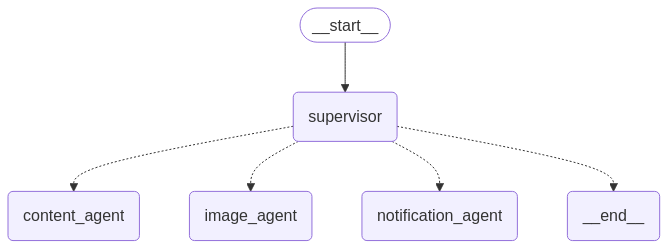

In [42]:
# Try to visualize the pipeline graph
try:
    # Visualize the graph (requires graphviz)
    display(Image(pipeline.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Unable to visualize graph: {e}")

### 3.2 Run the Pipeline with Streaming

Run the pipeline with streaming to see the intermediate results:

In [ ]:
# Set up inputs for the pipeline
inputs = {
    "messages": [
        {
            "role": "user", 
            "content": "Generate a carousel post about Python data analysis libraries"
        }
    ]
}

# Process and display streaming results
for output in pipeline.stream(inputs):
    if "__end__" not in output:
        step = list(output.keys())[-1]
        print(f"\n--- Step: {step} ---")
        
        # Display agent messages
        if step == "supervisor":
            supervisor_output = output[step]
            if "next" in supervisor_output:
                print(f"Supervisor decision: Next agent = {supervisor_output['next']}")
        elif step == "content_agent":
            print(output[step]["messages"][-1].content)
            if "content_json" in output[step]:
                content_json = output[step]["content_json"]
                print(f"Generated content with {len(content_json.get('content_pages', []))} pages")
        elif step == "image_agent":
            print(output[step]["messages"][-1].content)
            if "images" in output[step]:
                images = output[step]["images"]
                print(f"Generated {len(images)} images")
        elif step == "notification_agent":
            print(output[step]["messages"][-1].content)
            if "notification_status" in output[step]:
                print(f"Notification status: {output[step]['notification_status']}")

print("\nPipeline execution completed.")

### 3.3 Display the Final Results

After the pipeline has completed, we can display the generated images:

In [ ]:
# Import glob to find the generated images
import glob

# Find the PNG files in the output directory
png_files = sorted(glob.glob(str(output_dir / "*.png")))

if png_files:
    print(f"Found {len(png_files)} images:")
    for img_path in png_files:
        print(f"\nImage: {os.path.basename(img_path)}")
        display(Image(img_path))
else:
    print("No images found in the output directory.")

## 4. Full Pipeline in One Go

You can also run the entire pipeline in one go using the `run_pipeline()` method:

In [ ]:
# # Create a new output directory for this run
# import datetime
# # We only need to specify a base directory now
# # DateTime subdirectories will be created automatically
# new_output_dir = Path(f"notebook_output_run")
# new_output_dir.mkdir(exist_ok=True)

# # Create a new agent instance
# new_agent = InstagramAgent(
#     llm=llm,
#     output_dir=new_output_dir,
#     email_user=os.environ.get("EMAIL_USER"),
#     email_password=os.environ.get("EMAIL_PASSWORD")
# )

# # Run the complete pipeline
# request = "Generate a carousel post about AI-powered data visualization techniques"
# recipient_email = "your.email@example.com"  # Replace with your email if needed

# # Run with or without notification based on credentials
# if os.environ.get("EMAIL_USER") and os.environ.get("EMAIL_PASSWORD"):
#     results = new_agent.run_pipeline(request, recipient_email=recipient_email)
# else:
#     results = new_agent.run_pipeline(request)

# # Display results summary
# print("Pipeline execution completed.")
# print(f"Output directory: {results['output_dir']}")
# print(f"Content pages: {len(results['content']['content_pages'])}")
# print(f"Images generated: {len(results['images'])}")
# if 'notification' in results:
#     print(f"Notification sent: {results['notification']['sent']}")

### 4.1 Display the Results from the Full Pipeline Run

In [ ]:
# # Display the images from the full pipeline run
# for img in results['images']:
#     print(f"\n{img['type'].capitalize()}{' ' + str(img['page_number']) if 'page_number' in img else ''}:")
#     display(Image(img['path']))

## 5. New Features

The `ig_agent` library includes several key features that improve its functionality:

1. **Content Line Breaks**: Content text is now broken into lines with approximately 18 words per line, making the text more readable on Instagram carousel posts.

2. **DateTime-based Output Directories**: Output files are now organized in a hierarchical directory structure:
   - Base directory (e.g., "notebook_output")
   - Date subfolder (e.g., "2025-04-20")
   - Timestamp subfolder (e.g., "20250420_154900")

This organization makes it easier to track and manage multiple content generation runs and preserves a history of generated content.

## 6. Summary

The `ig_agent` library provides a powerful multi-agent system for generating Instagram carousel posts. You can use it in several ways:

1. **Direct API**: Use the individual methods for fine-grained control over each step
2. **LangGraph Pipeline**: Use the graph-based workflow with streaming results
3. **One-step Pipeline**: Run the entire process in one go with `run_pipeline()`

The system generates structured content, converts it to visually appealing images using SVG templates, and optionally sends notifications or posts to Instagram.